In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import r2_score,recall_score,precision_score,accuracy_score,classification_report,confusion_matrix

# EDA

In [101]:
data=pd.read_csv("marriage_divorce_india_with_id.csv")
data.head(5)

,Unique ID,Marriage Duration (Years),Age at Marriage,Marriage Type,Education Level,Income Level (INR per month),Caste/Religion,Urban/Rural,Family Involvement,Children,Divorce Status
0,MD1,39,29,Love,Secondary,113464,Hindu,Rural,Moderate,2,No
1,MD2,29,34,Arranged,No Education,18682,Jain,Rural,Moderate,0,Yes
2,MD3,15,34,Love,No Education,159455,Muslim,Urban,Moderate,4,Yes
3,MD4,8,27,Arranged,Postgraduate,63160,Jain,Urban,High,1,Yes
4,MD5,21,34,Love,Secondary,28666,Jain,Urban,High,1,Yes


In [102]:
data=data.drop("Unique ID",axis=1)

<Axes: xlabel='Divorce Status', ylabel='count'>

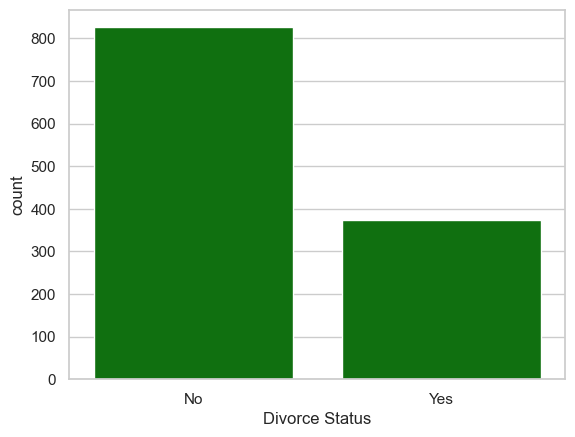

In [103]:
sns.countplot(x="Divorce Status",data=data,color="green")

# Feature Engineering

In [104]:
data["Divorce Status"]=data["Divorce Status"].replace({"Yes":1,"No":0})
data["Family Involvement"]=data["Family Involvement"].replace({"Low":1,"Moderate":2,"High":3})

/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_95544/3585270235.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Divorce Status"]=data["Divorce Status"].replace({"Yes":1,"No":0})
/var/folders/km/41xdld515hq8qyv7nx3qq6n80000gn/T/ipykernel_95544/3585270235.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["Family Involvement"]=data["Family Involvement"].replace({"Low":1,"Moderate":2,"High":3})


In [105]:
le=LabelEncoder()
data["Marriage Type"]=le.fit_transform(data["Marriage Type"])
data["Education Level"]=le.fit_transform(data["Education Level"])
data["Caste/Religion"]=le.fit_transform(data["Caste/Religion"])
data["Urban/Rural"]=le.fit_transform(data["Urban/Rural"])

In [106]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   Marriage Duration (Years)     1200 non-null   int64
 1   Age at Marriage               1200 non-null   int64
 2   Marriage Type                 1200 non-null   int64
 3   Education Level               1200 non-null   int64
 4   Income Level (INR per month)  1200 non-null   int64
 5   Caste/Religion                1200 non-null   int64
 6   Urban/Rural                   1200 non-null   int64
 7   Family Involvement            1200 non-null   int64
 8   Children                      1200 non-null   int64
 9   Divorce Status                1200 non-null   int64
dtypes: int64(10)
memory usage: 93.9 KB


<Axes: >

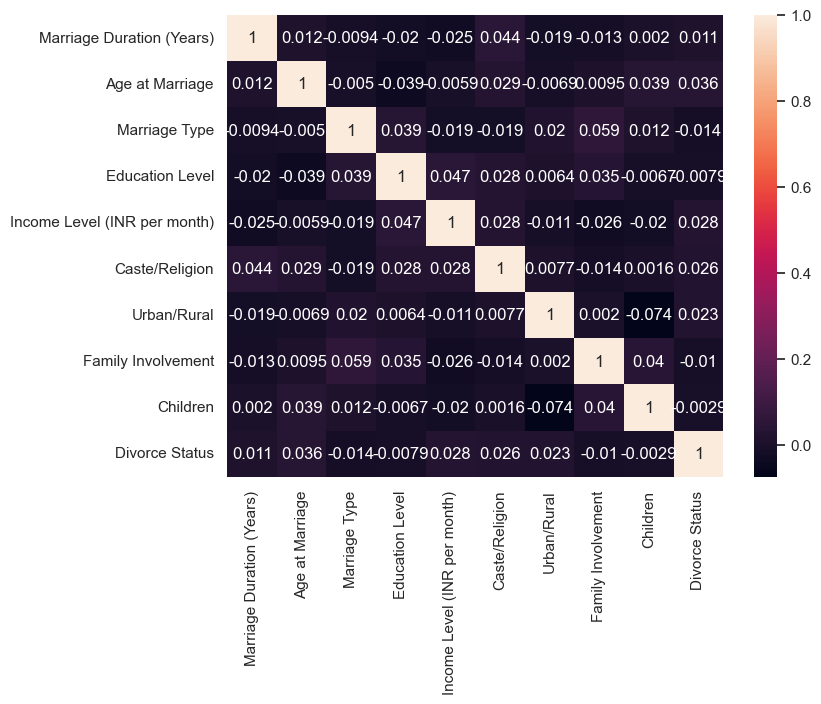

In [107]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(),annot=True)

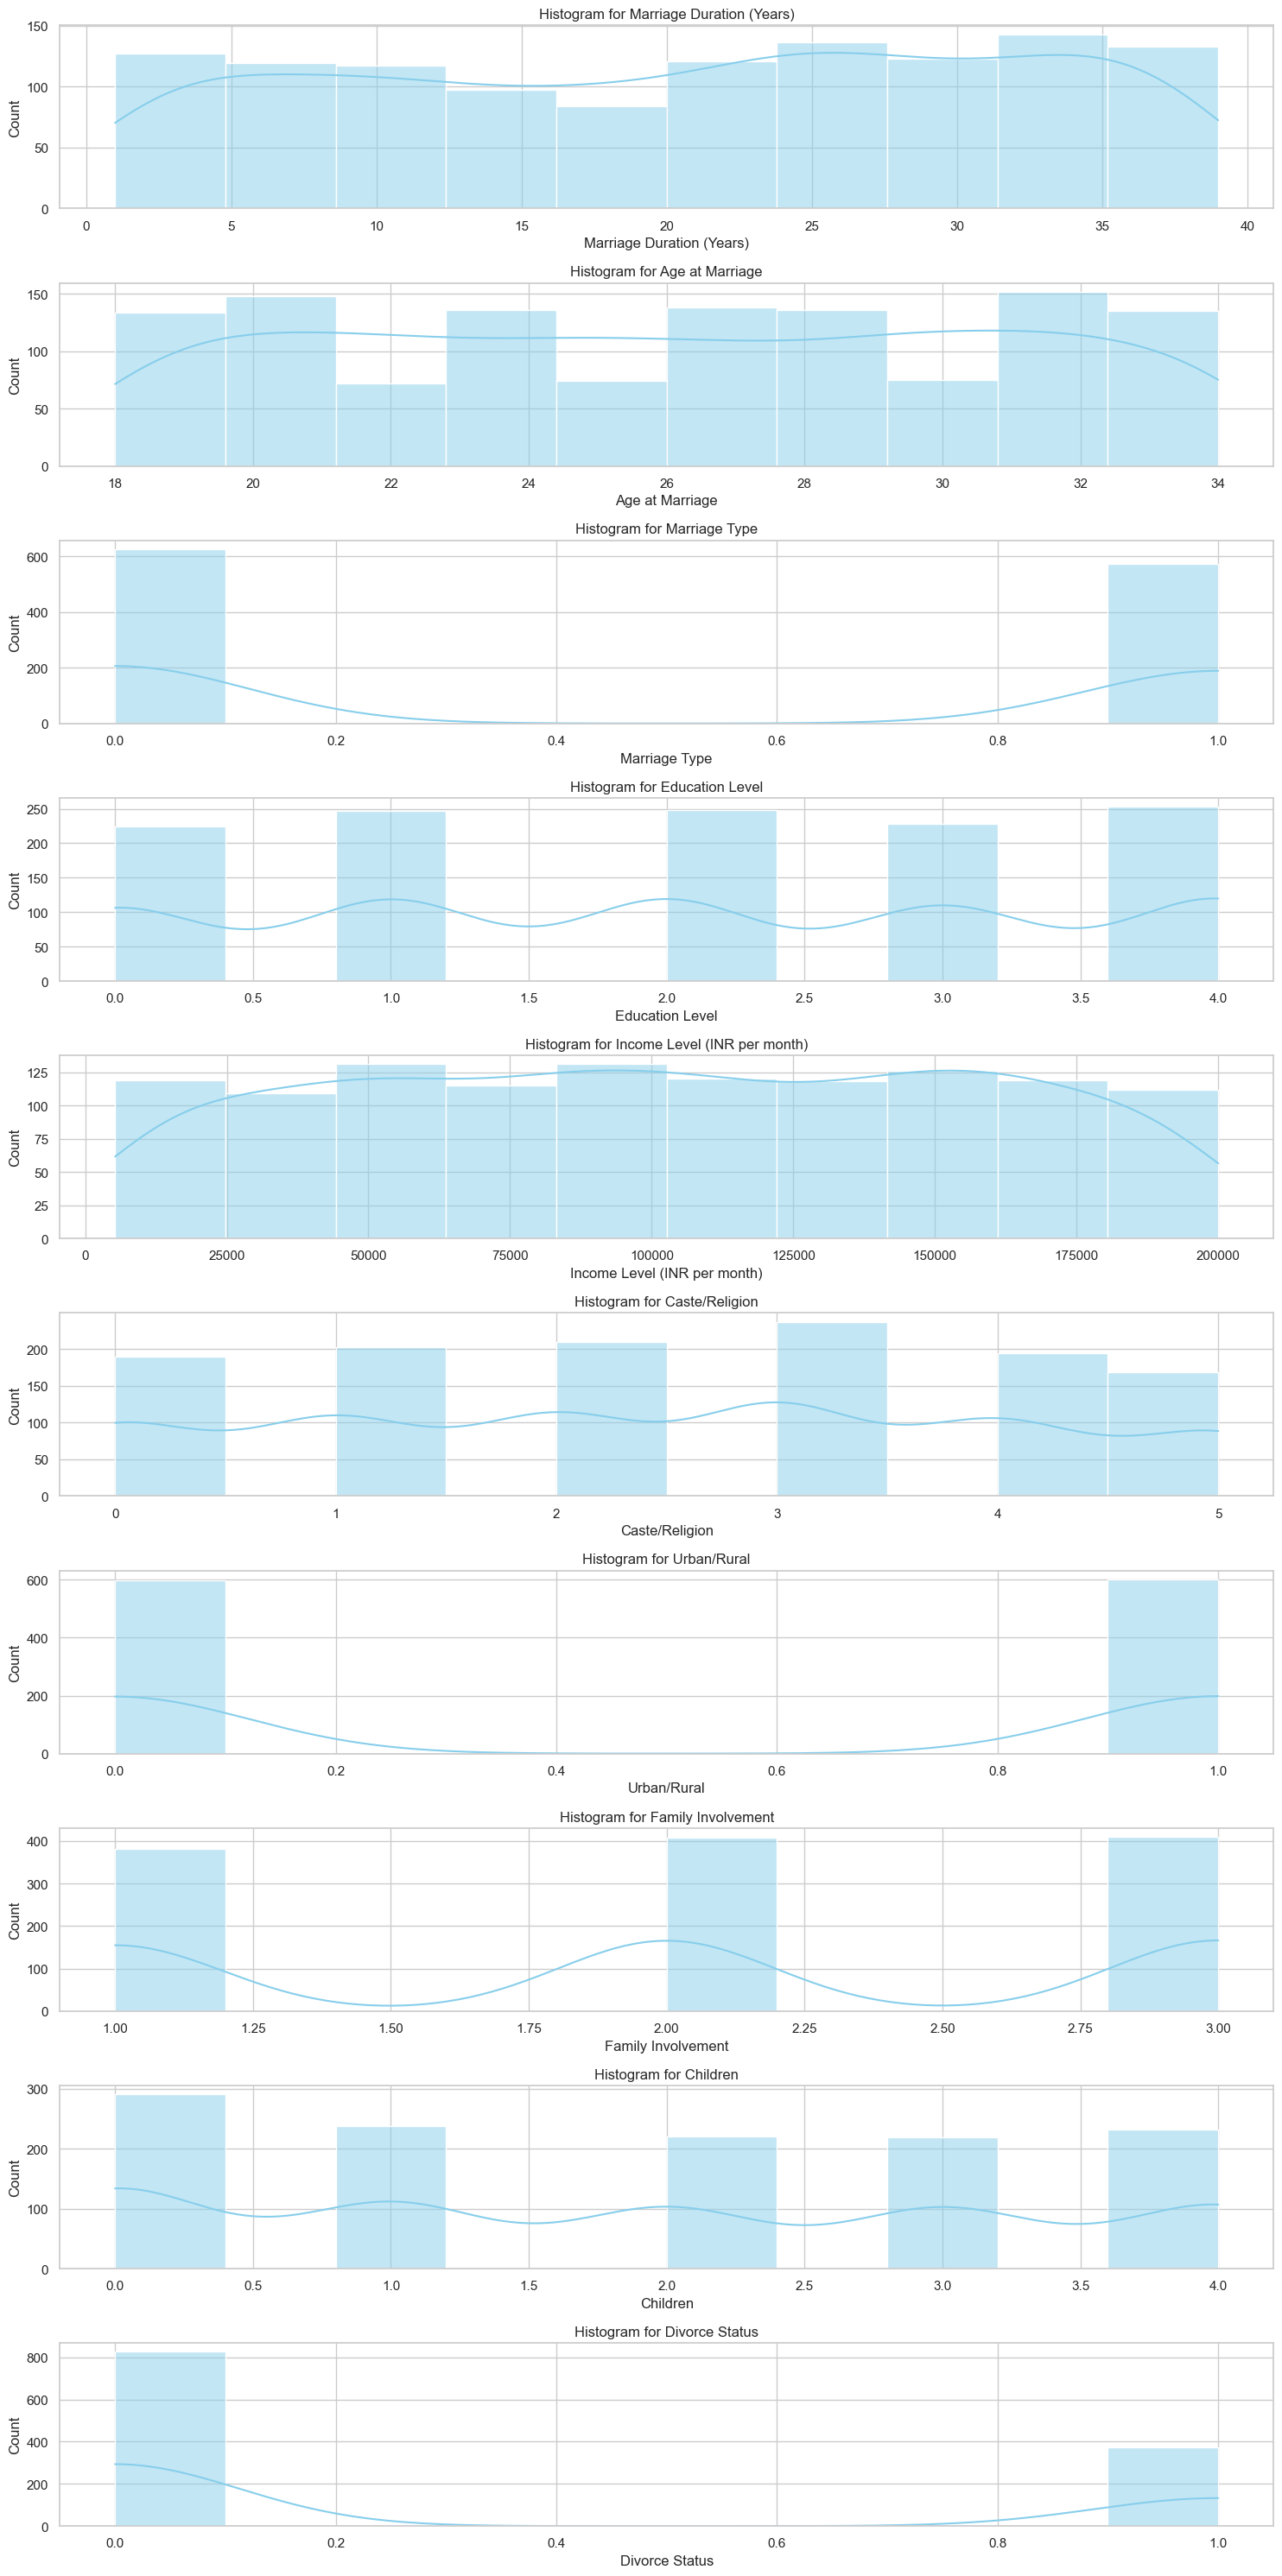

In [108]:
sns.set(style="whitegrid")
plt.figure(figsize=(15, len(data.columns)*3))
for i, col in enumerate(data.columns, 1):
    plt.subplot(len(data.columns), 1, i) 
    sns.histplot(data[col], kde=True, bins=10, color='skyblue')
    plt.title(f"Histogram for {col}")
plt.tight_layout()
plt.show()

In [109]:
ss=StandardScaler()
x = data.drop(["Divorce Status"], axis=1)
y=data["Divorce Status"]
x=ss.fit_transform(x)

In [110]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Classifiers

In [111]:
classifier={
    "Logistic Regression":LogisticRegression(),
    "Random Forest Classifier":RandomForestClassifier(),
    "Decision Tree Classifier":DecisionTreeClassifier(),
    "Ada Boost Classifier":AdaBoostClassifier(),
    "XG Boost Classifier":XGBClassifier()
}

In [112]:
for name,clf in classifier.items():
    clf.fit(x_train,y_train)
    y_pred=clf.predict(x_test)
    accuracy=accuracy_score(y_test,y_pred)
    print(f"{name}")
    print(f"{accuracy*100}")
    print(classification_report(y_test,y_pred))

Logistic Regression
71.25
              precision    recall  f1-score   support

           0       0.71      1.00      0.83       171
           1       0.00      0.00      0.00        69

    accuracy                           0.71       240
   macro avg       0.36      0.50      0.42       240
weighted avg       0.51      0.71      0.59       240

Random Forest Classifier
70.41666666666667
              precision    recall  f1-score   support

           0       0.72      0.95      0.82       171
           1       0.44      0.10      0.16        69

    accuracy                           0.70       240
   macro avg       0.58      0.52      0.49       240
weighted avg       0.64      0.70      0.63       240

Decision Tree Classifier
58.333333333333336
              precision    recall  f1-score   support

           0       0.73      0.67      0.70       171
           1       0.31      0.38      0.34        69

    accuracy                           0.58       240
   macro avg   

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

Ada Boost Classifier
71.25
              precision    recall  f1-score   support

           0       0.72      0.99      0.83       171
           1       0.50      0.03      0.05        69

    accuracy                           0.71       240
   macro avg       0.61      0.51      0.44       240
weighted avg       0.65      0.71      0.61       240

XG Boost Classifier
62.916666666666664
              precision    recall  f1-score   support

           0       0.72      0.78      0.75       171
           1       0.32      0.26      0.29        69

    accuracy                           0.63       240
   macro avg       0.52      0.52      0.52       240
weighted avg       0.61      0.63      0.62       240



In [115]:
result={
    "Model":["XG Boost Classifier","Random Forest Classifier","Decision Tree Classifier","Ada Boost Classifier","Logistic Regression"],
    "Accuracy":[62.91,70.41,58.33,71.25,71.25]
}

In [117]:
result_df=pd.DataFrame(result)

# Result

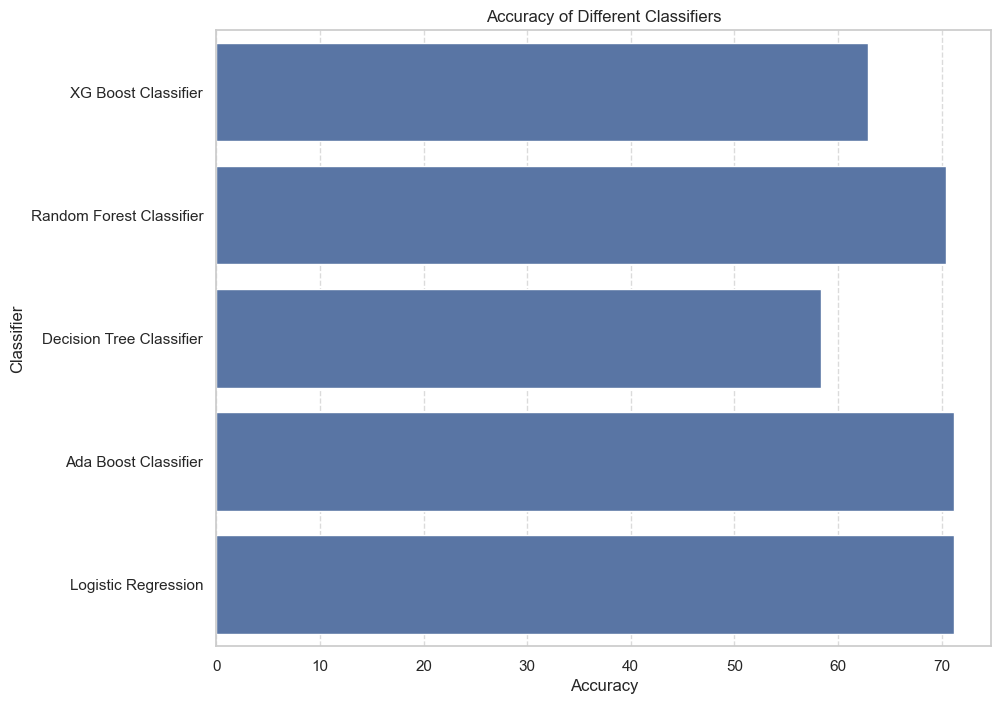

In [127]:
plt.figure(figsize=(10, 8))
sns.barplot(x="Accuracy", y="Model", data=result_df)
plt.title("Accuracy of Different Classifiers")
plt.xlabel("Accuracy")
plt.ylabel("Classifier") 
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()